In [3]:
# Data Loading & Preprocessing
# Setting up the environment
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

In [4]:
# Transform: Convert images to tensors and normalize
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [5]:
# Loading MNIST dataset (training and testing data)
train_data = datasets.MNIST(root='./dataset', download=True, train=True, transform=data_transforms)
test_data = datasets.MNIST(root='./dataset', download=True, train=False, transform=data_transforms)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 37670111.73it/s]


Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1079919.89it/s]

Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 2342975.30it/s]


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2528271.90it/s]

Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



In [6]:

# DataLoader for training and testing data
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)

In [7]:
# Visualization of the original dataset
def show_images(images, labels, title='Images Preview'):
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        ax = axs[i // 5, i % 5]
        ax.imshow(images[i].squeeze().numpy(), cmap='gray')
        ax.set_title(f'{title}: {labels[i].item()}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

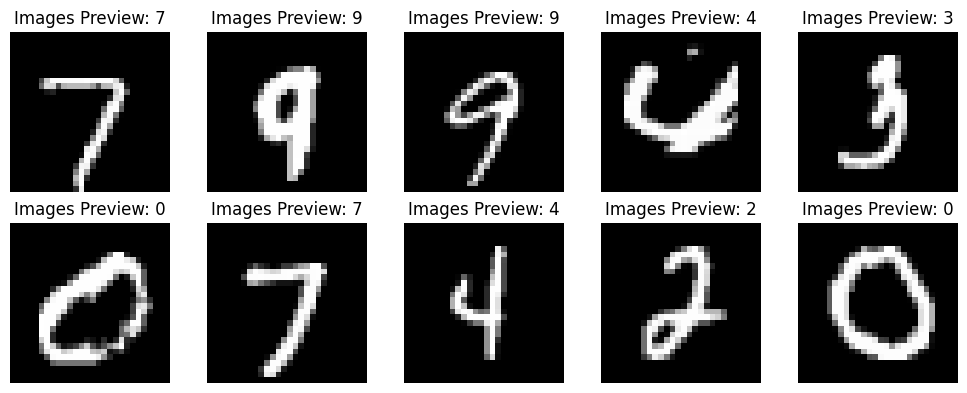

In [8]:
# Load a batch of images and labels for visualization
train_images, train_labels = next(iter(train_loader))
show_images(train_images, train_labels)

In [9]:
# Data Augmentation for improved learning
augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomVerticalFlip(),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [10]:
# Augmented MNIST dataset
augmented_train_data = datasets.MNIST(root='./dataset', download=True, train=True, transform=augmentation_transforms)
augmented_train_loader = DataLoader(dataset=augmented_train_data, batch_size=64, shuffle=True)

In [11]:
# Visualization of augmented dataset
def show_augmented_images(images, labels, title='Augmented Images'):
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        ax = axs[i // 5, i % 5]
        ax.imshow(images[i].squeeze().numpy(), cmap='gray')
        ax.set_title(f'{title}: {labels[i].item()}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

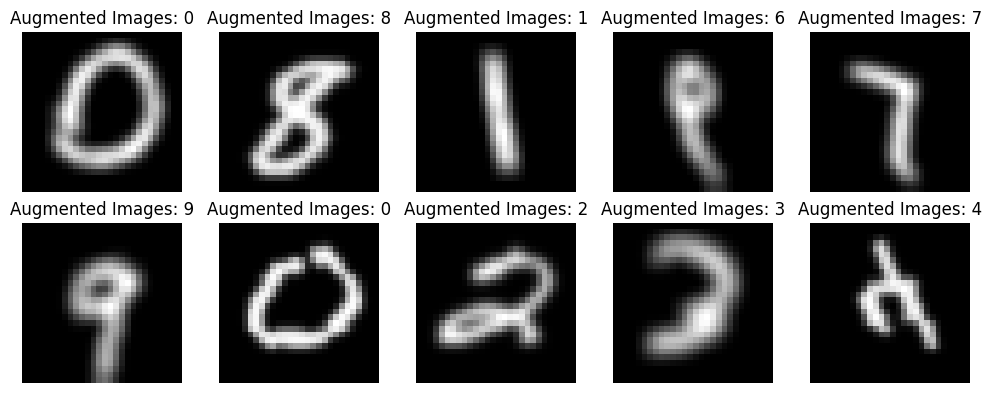

In [12]:

# Load a batch of augmented images for visualization
augmented_images, labels = next(iter(augmented_train_loader))
show_augmented_images(augmented_images, labels)

In [ ]:
#Training a Basic Multi-Layer Perceptron (MLP) Model

In [13]:
import torch.nn as nn
import torch.optim as optim

In [17]:

# Defining a simple MLP architecture
class BasicMLP(nn.Module):
    def __init__(self, input_dim=28*28, hidden_units=512, output_dim=10):
        super(BasicMLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_units)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(hidden_units, output_dim)

    # Forward pass: Flow through the layers
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input image
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x


In [18]:
# Initialize model, loss function, and optimizer
mlp_model = BasicMLP()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.0009)  # Adam optimizer


In [19]:
# Training Loop
num_epochs = 30
for epoch in range(num_epochs):
    mlp_model.train()
    epoch_loss = 0
    for batch_images, batch_labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        predictions = mlp_model(batch_images)  # Forward pass
        loss = loss_function(predictions, batch_labels)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)  # Average loss for the epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.2f}')

Epoch [1/30], Loss: 0.32
Epoch [2/30], Loss: 0.14
Epoch [3/30], Loss: 0.10
Epoch [4/30], Loss: 0.09
Epoch [5/30], Loss: 0.07
Epoch [6/30], Loss: 0.06
Epoch [7/30], Loss: 0.06
Epoch [8/30], Loss: 0.05
Epoch [9/30], Loss: 0.05
Epoch [10/30], Loss: 0.04
Epoch [11/30], Loss: 0.04
Epoch [12/30], Loss: 0.03
Epoch [13/30], Loss: 0.03
Epoch [14/30], Loss: 0.03
Epoch [15/30], Loss: 0.03
Epoch [16/30], Loss: 0.02
Epoch [17/30], Loss: 0.02
Epoch [18/30], Loss: 0.03
Epoch [19/30], Loss: 0.02
Epoch [20/30], Loss: 0.02
Epoch [21/30], Loss: 0.02
Epoch [22/30], Loss: 0.02
Epoch [23/30], Loss: 0.02
Epoch [24/30], Loss: 0.01
Epoch [25/30], Loss: 0.02
Epoch [26/30], Loss: 0.02
Epoch [27/30], Loss: 0.02
Epoch [28/30], Loss: 0.01
Epoch [29/30], Loss: 0.02
Epoch [30/30], Loss: 0.01
